# <center><span style="color:blue">Itérations 2 et 3 du projet Co2Py - Nathalie</span></center>

In [1]:
from datetime import datetime
from time import strftime, time
deb=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',deb)


heure de début : 2022-02-26 16:38:09


## <span style="color:blue">1.    Préprocessing</span>

### <span style="color:blue">&nbsp; &nbsp;1.1.    Préparation des données catégorielles</span>

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('data_avant_preprocessing.csv',index_col=0)
display(data.head())
display(data.info())
display(data.describe())

,Carburant,Hybride,Puissance maximale (kW),type_boite,nombre_vitesses,CO2 (g/km),Carrosserie,gamme,masse vide moyenne
0,ES,non,147.0,M,6,182.0,BREAK,MOY-SUPER,1505.0
1,GO,non,125.0,M,6,136.0,BERLINE,MOY-SUPER,1565.0
2,GO,non,100.0,M,6,134.0,BERLINE,MOY-SUPER,1565.0
4,GO,non,125.0,M,6,139.0,BERLINE,MOY-SUPER,1565.0
6,ES,non,147.0,M,6,186.0,BREAK,MOY-SUPER,1555.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 0 to 44849
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Carburant                5718 non-null   object 
 1   Hybride                  5718 non-null   object 
 2   Puissance maximale (kW)  5718 non-null   float64
 3   type_boite               5718 non-null   object 
 4   nombre_vitesses          5718 non-null   int64  
 5   CO2 (g/km)               5718 non-null   float64
 6   Carrosserie              5718 non-null   object 
 7   gamme                    5718 non-null   object 
 8   masse vide moyenne       5718 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 446.7+ KB


None

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne
count,5718.000000,5718.000000,5718.000000,5718.000000
mean,133.678716,6.052641,170.480937,1777.861315
std,75.125533,1.112459,50.769361,444.139129
min,40.000000,0.000000,79.000000,825.000000
25%,88.000000,6.000000,134.000000,1475.000000
50%,115.000000,6.000000,159.000000,1685.000000
75%,150.000000,7.000000,203.000000,2063.250000
max,559.300000,8.000000,572.000000,2905.000000


In [4]:
#copie de secours avant de finir les traitements
data_copy=data.copy()

In [5]:
data=data_copy.copy() 
#encore un peu de préprocessing nécessaire
data= data.astype({"nombre_vitesses": int})
data_num=data.select_dtypes(include=np.number)
data_cat=data.select_dtypes(exclude=np.number)
data = data_num.join(pd.get_dummies(data_cat,prefix=data_cat.columns)) 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 0 to 44849
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Puissance maximale (kW)          5718 non-null   float64
 1   nombre_vitesses                  5718 non-null   int32  
 2   CO2 (g/km)                       5718 non-null   float64
 3   masse vide moyenne               5718 non-null   float64
 4   Carburant_EH                     5718 non-null   uint8  
 5   Carburant_ES                     5718 non-null   uint8  
 6   Carburant_ES/GN                  5718 non-null   uint8  
 7   Carburant_ES/GP                  5718 non-null   uint8  
 8   Carburant_FE                     5718 non-null   uint8  
 9   Carburant_GH                     5718 non-null   uint8  
 10  Carburant_GN                     5718 non-null   uint8  
 11  Carburant_GN/ES                  5718 non-null   uint8  
 12  Carburant_GO       

In [6]:
data.columns

Index(['Puissance maximale (kW)', 'nombre_vitesses', 'CO2 (g/km)',
       'masse vide moyenne', 'Carburant_EH', 'Carburant_ES', 'Carburant_ES/GN',
       'Carburant_ES/GP', 'Carburant_FE', 'Carburant_GH', 'Carburant_GN',
       'Carburant_GN/ES', 'Carburant_GO', 'Carburant_GP/ES', 'Hybride_non',
       'Hybride_oui', 'type_boite_A', 'type_boite_D', 'type_boite_M',
       'type_boite_S', 'type_boite_V', 'Carrosserie_BERLINE',
       'Carrosserie_BREAK', 'Carrosserie_CABRIOLET', 'Carrosserie_COMBISPACE',
       'Carrosserie_COUPE', 'Carrosserie_MINIBUS', 'Carrosserie_MINISPACE',
       'Carrosserie_MONOSPACE', 'Carrosserie_MONOSPACE COMPACT',
       'Carrosserie_TS TERRAINS/CHEMINS', 'gamme_ECONOMIQUE',
       'gamme_INFERIEURE', 'gamme_LUXE', 'gamme_MOY-INFER', 'gamme_MOY-SUPER',
       'gamme_SUPERIEURE'],
      dtype='object')

In [7]:
data.describe()

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_EH,Carburant_ES,Carburant_ES/GN,Carburant_ES/GP,Carburant_FE,Carburant_GH,...,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,...,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,133.678716,6.052641,170.480937,1777.861315,0.011717,0.363414,0.001049,0.002099,0.000874,0.002448,...,0.013466,0.015915,0.033928,0.098986,0.019237,0.138685,0.221056,0.357468,0.155649,0.107905
std,75.125533,1.112459,50.769361,444.139129,0.107620,0.481025,0.032379,0.045767,0.029560,0.049425,...,0.115270,0.125156,0.181060,0.298669,0.137371,0.345648,0.414995,0.479296,0.362554,0.310287
min,40.000000,0.000000,79.000000,825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,6.000000,134.000000,1475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.000000,6.000000,159.000000,1685.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,7.000000,203.000000,2063.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,559.300000,8.000000,572.000000,2905.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
data.to_csv('data_preprocessee.csv')

### <span style="color:blue">&nbsp; &nbsp;1.2.    Choix de la méthode de normalisation</span>

#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;1.2.1. Robustscaler</span>

In [8]:
#comme déjà vu auparavant les ordres de grandeur sont très différents, nous allons normaliser les valeurs,
#Comme il y a quelques outliers je teste d'abord avec un RobustScaler()
from sklearn import preprocessing
scaler=preprocessing.RobustScaler()
data_R=pd.DataFrame(scaler.fit_transform(data),index=data.index, columns=data.columns)
data_R.describe()

#le résultat du préprocessing est bien visible sur le describe

,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_EH,Carburant_ES,Carburant_ES/GN,Carburant_ES/GP,Carburant_FE,Carburant_GH,...,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,...,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,0.301270,0.052641,0.166390,0.157860,0.011717,0.363414,0.001049,0.002099,0.000874,0.002448,...,0.013466,0.015915,0.033928,0.098986,0.019237,0.138685,0.221056,0.357468,0.155649,0.107905
std,1.211702,1.112459,0.735788,0.755018,0.107620,0.481025,0.032379,0.045767,0.029560,0.049425,...,0.115270,0.125156,0.181060,0.298669,0.137371,0.345648,0.414995,0.479296,0.362554,0.310287
min,-1.209677,-6.000000,-1.159420,-1.461963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.435484,0.000000,-0.362319,-0.356991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564516,1.000000,0.637681,0.643009,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.166129,2.000000,5.985507,2.073948,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Maintenant créons les jeux de données
feats_R=data_R.drop(['CO2 (g/km)'],axis=1)
target_R=data_R['CO2 (g/km)']


In [10]:
#importation de train test split et de modèles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import RidgeCV , LassoCV, lasso_path, Ridge
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score


In [11]:
#nous créons un jeu d'entraintement de 80% de la base et un jeu de test de 20%
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(feats_R, target_R, test_size=0.2, random_state=1)


In [12]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

#Comme analysé lors de l'itération 1 nous gardons le modèle de ridge avec alpha = 0.7 comme modèle de référence à améliorer 
#au cours de cette itération 2
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')

start = time()

ridge_reg_R=Ridge(alpha= 0.7)
ridge_reg_R.fit(X_train_R, y_train_R)


# Evaluation du training set
train_score_R=ridge_reg_R.score(X_train_R,y_train_R)
ridge_pred_train_R = ridge_reg_R.predict(X_train_R)
train_rmse_R=np.sqrt(mean_squared_error(ridge_pred_train_R, y_train_R))



print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {:.2f}".format(train_rmse_R))
print("le score est {:2.2%}".format(train_score_R))
print('\n')



# Evaluation du testing set

test_score_R=ridge_reg_R.score(X_test_R,y_test_R)  
ridge_pred_test_R = ridge_reg_R.predict(X_test_R)
test_rmse_R=np.sqrt(mean_squared_error(ridge_pred_test_R, y_test_R))

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est de  {:.2f}".format(test_rmse_R))
print('le score est de {:2.2%}'.format(test_score_R))
print('\n')



ecart_rmse=test_rmse_R/train_rmse_R-1
ecart_score=(test_score_R-train_score_R)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')


fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


lst_col=['modèle',
         'paramètres',
         'normalisation',
         'nombre de variables',
         'méthode sélection variables',
         'train score',
         'test score',
         'écart score',
         'train rmse',
         'test rmse',
         'écart rmse',
         'temps exécution (ms)']

lst_val=[['Ridge',
          'Alpha=0.7',
          'RobustScaler',
          len(X_train_R.columns),
          'aucune',
          train_score_R,
          test_score_R,
          ecart_score,
          train_rmse_R,
          test_rmse_R,
          ecart_rmse,
          elapsed]]

resultats=pd.DataFrame(lst_val,columns=lst_col)
resultats

heure de début : 2022-02-26 16:38:11


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 0.26
le score est 87.26%


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est de  0.26
le score est de 86.82%


l'effet d'apprentissage est de
--------------------------------------
0.64% sur l'erreur quadratique moyenne 
de -0.44 points sur le score.


heure de fin : 2022-02-26 16:38:11
Temps d'exécution : 0.028ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.2632,0.264881,0.006387,0.027902


#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;1.2.2. StandardScaler</span>

In [13]:
#je compare avec un preprocessing en standard scaler
scaler=preprocessing.StandardScaler()
data_std=pd.DataFrame(scaler.fit_transform(data),index=data.index, columns=data.columns)
data_std.describe()


,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_EH,Carburant_ES,Carburant_ES/GN,Carburant_ES/GP,Carburant_FE,Carburant_GH,...,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
count,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,...,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03,5.718000e+03
mean,-2.657662e-15,-8.957593e-15,-6.011281e-17,3.138278e-16,6.000456e-16,7.887360e-15,-1.212122e-15,-3.625530e-16,-6.713362e-16,-1.341017e-15,...,2.430792e-15,1.976733e-15,-6.276022e-16,-1.176937e-15,-2.081280e-15,3.734334e-16,3.108197e-15,3.122721e-15,5.116928e-15,4.546672e-15
std,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,...,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00,1.000087e+00
min,-1.247071e+00,-5.441254e+00,-1.802050e+00,-2.145599e+00,-1.088867e-01,-7.555654e-01,-3.241019e-02,-4.585902e-02,-2.958373e-02,-4.954208e-02,...,-1.168335e-01,-1.271693e-01,-1.874019e-01,-3.314517e-01,-1.400530e-01,-4.012670e-01,-5.327193e-01,-7.458833e-01,-4.293499e-01,-3.477883e-01
25%,-6.080850e-01,-4.732345e-02,-7.186249e-01,-6.819660e-01,-1.088867e-01,-7.555654e-01,-3.241019e-02,-4.585902e-02,-2.958373e-02,-4.954208e-02,...,-1.168335e-01,-1.271693e-01,-1.874019e-01,-3.314517e-01,-1.400530e-01,-4.012670e-01,-5.327193e-01,-7.458833e-01,-4.293499e-01,-3.477883e-01
50%,-2.486551e-01,-4.732345e-02,-2.261589e-01,-2.090999e-01,-1.088867e-01,-7.555654e-01,-3.241019e-02,-4.585902e-02,-2.958373e-02,-4.954208e-02,...,-1.168335e-01,-1.271693e-01,-1.874019e-01,-3.314517e-01,-1.400530e-01,-4.012670e-01,-5.327193e-01,-7.458833e-01,-4.293499e-01,-3.477883e-01
75%,2.172725e-01,8.516650e-01,6.405814e-01,6.426222e-01,-1.088867e-01,1.323512e+00,-3.241019e-02,-4.585902e-02,-2.958373e-02,-4.954208e-02,...,-1.168335e-01,-1.271693e-01,-1.874019e-01,-3.314517e-01,-1.400530e-01,-4.012670e-01,-5.327193e-01,1.340692e+00,-4.293499e-01,-3.477883e-01
max,5.665963e+00,1.750653e+00,7.909380e+00,2.538027e+00,9.183860e+00,1.323512e+00,3.085450e+01,2.180596e+01,3.380237e+01,2.018486e+01,...,8.559190e+00,7.863534e+00,5.336125e+00,3.017031e+00,7.140155e+00,2.492106e+00,1.877161e+00,1.340692e+00,2.329103e+00,2.875313e+00


In [14]:
feats_std=data_std.drop(['CO2 (g/km)'],axis=1)
target_std=data_std['CO2 (g/km)']

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(feats_std, target_std, test_size=0.2, random_state=1)


debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')

start = time()

ridge_reg_std=Ridge(alpha= 0.7)
ridge_reg_std.fit(X_train_std, y_train_std)

# Evaluation du training set
train_score_std=ridge_reg_std.score(X_train_std,y_train_std)
ridge_pred_train_std = ridge_reg_std.predict(X_train_std)
train_rmse_std=np.sqrt(mean_squared_error(ridge_pred_train_std, y_train_std))



print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {:.2f}".format(train_rmse_std))
print("le score est {:2.2%}".format(train_score_std))
print('\n')



# Evaluation du testing set

test_score_std=ridge_reg_std.score(X_test_std,y_test_std)  
ridge_pred_test_std = ridge_reg_std.predict(X_test_std)
test_rmse_std=np.sqrt(mean_squared_error(ridge_pred_test_std, y_test_std))

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est de  {:.2f}".format(test_rmse_std))
print('le score est de {:2.2%}'.format(test_score_std))
print('\n')



ecart_rmse=test_rmse_std/train_rmse_std-1
ecart_score=(test_score_std-train_score_std)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


lst_val=[['Ridge',
          'Alpha=0.7',
          'StandardScaler',
          len(X_train_std.columns),
          'aucune',
         train_score_std,
         test_score_std,
         ecart_score,
         train_rmse_std,
         test_rmse_std,
         ecart_rmse,
         elapsed]]

res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats

heure de début : 2022-02-26 16:38:11


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 0.36
le score est 87.26%


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est de  0.36
le score est de 86.84%


l'effet d'apprentissage est de
--------------------------------------
0.54% sur l'erreur quadratique moyenne 
de -0.41 points sur le score.


heure de fin : 2022-02-26 16:38:11
Temps d'exécution : 0.009ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969


#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;1.2.3. MinMaxscaler</span>

In [15]:
#je compare avec un preprocessing en MinMax scaler
scaler=preprocessing.MinMaxScaler()
data_mM=pd.DataFrame(scaler.fit_transform(data),index=data.index, columns=data.columns)
data_mM.describe()


,Puissance maximale (kW),nombre_vitesses,CO2 (g/km),masse vide moyenne,Carburant_EH,Carburant_ES,Carburant_ES/GN,Carburant_ES/GP,Carburant_FE,Carburant_GH,...,Carrosserie_MINISPACE,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
count,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,...,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000,5718.000000
mean,0.180394,0.756580,0.185560,0.458106,0.011717,0.363414,0.001049,0.002099,0.000874,0.002448,...,0.013466,0.015915,0.033928,0.098986,0.019237,0.138685,0.221056,0.357468,0.155649,0.107905
std,0.144667,0.139057,0.102980,0.213528,0.107620,0.481025,0.032379,0.045767,0.029560,0.049425,...,0.115270,0.125156,0.181060,0.298669,0.137371,0.345648,0.414995,0.479296,0.362554,0.310287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.092432,0.750000,0.111562,0.312500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.144425,0.750000,0.162272,0.413462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.211824,0.875000,0.251521,0.595313,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
feats_mM=data_mM.drop(['CO2 (g/km)'],axis=1)
target_mM=data_mM['CO2 (g/km)']


X_train_mM, X_test_mM, y_train_mM, y_test_mM = train_test_split(feats_mM, target_mM, test_size=0.2, random_state=1)

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')

start = time()

ridge_reg_mM=Ridge(alpha= 0.7)
ridge_reg_mM.fit(X_train_mM, y_train_mM)

# Evaluation du training set
train_score_mM=ridge_reg_mM.score(X_train_mM,y_train_mM)
ridge_pred_train_mM = ridge_reg_mM.predict(X_train_mM)
train_rmse_mM=np.sqrt(mean_squared_error(ridge_pred_train_mM, y_train_mM))



print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {:.2f}".format(train_rmse_mM))
print("le score est {:2.2%}".format(train_score_mM))
print('\n')



# Evaluation du testing set

test_score_mM=ridge_reg_mM.score(X_test_mM,y_test_mM)  
ridge_pred_test_mM = ridge_reg_mM.predict(X_test_mM)
test_rmse_mM=np.sqrt(mean_squared_error(ridge_pred_test_mM, y_test_mM))

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est de  {:.2f}".format(test_rmse_mM))
print('le score est de {:2.2%}'.format(test_score_mM))
print('\n')



ecart_rmse=test_rmse_mM/train_rmse_mM-1
ecart_score=(test_score_mM-train_score_mM)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


lst_val=[['Ridge',
          'Alpha=0.7',
          'MinMaxScaler',
          len(X_train_mM.columns),
          'aucune',
         train_score_mM,
         test_score_mM,
         ecart_score,
         train_rmse_mM,
         test_rmse_mM,
         ecart_rmse,
         elapsed]]

res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats

heure de début : 2022-02-26 16:38:11


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 0.04
le score est 87.25%


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est de  0.04
le score est de 86.89%


l'effet d'apprentissage est de
--------------------------------------
0.31% sur l'erreur quadratique moyenne 
de -0.35 points sur le score.


heure de fin : 2022-02-26 16:38:11
Temps d'exécution : 0.009ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970


#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;1.2.4. Comparaison des résultats avec les 3 méthodes</span>

In [17]:
best=pd.DataFrame({'train_score_max':[resultats.iloc[resultats['train score'].idxmax(),2],max(resultats['train score'])],
                   'test_score_max':[resultats.iloc[resultats['test score'].idxmax(),2],max(resultats['test score'])],
                   'train_rmse_min':[resultats.iloc[resultats['train rmse'].idxmin(),2],min(resultats['train rmse'])],
                   'test_rmse_min':[resultats.iloc[resultats['test rmse'].idxmin(),2],min(resultats['test rmse'])]},
                index=['type de normalisation','valeur'])
        
best

,train_score_max,test_score_max,train_rmse_min,test_rmse_min
type de normalisation,StandardScaler,MinMaxScaler,MinMaxScaler,MinMaxScaler
valeur,0.872566,0.868937,0.036851,0.036963


In [18]:
pire=pd.DataFrame({'train_score_min':[resultats.iloc[resultats['train score'].idxmin(),2],min(resultats['train score'])],
                   'test_score_min':[resultats.iloc[resultats['test score'].idxmin(),2],min(resultats['test score'])],
                   'train_rmse_max':[resultats.iloc[resultats['train rmse'].idxmax(),2],max(resultats['train rmse'])],
                   'test_rmse_max':[resultats.iloc[resultats['test rmse'].idxmax(),2],max(resultats['test rmse'])]},
                index=['type de normalisation','valeur'])
        
pire

,train_score_min,test_score_min,train_rmse_max,test_rmse_max
type de normalisation,MinMaxScaler,RobustScaler,StandardScaler,StandardScaler
valeur,0.872456,0.868162,0.357721,0.359638


In [19]:
#Le MinMax a les meilleures rmse et de loin tant en entraînement que sur le jeu de test
#et le meilleur score sur le jeu de test et le plus faible effet de surapprentisage. Je vais donc standardiser via un MinMax.


## <span style="color:blue">2.    Itération 2 : test de polynomial features</span>

### <span style="color:blue">&nbsp; &nbsp;2.1. Recherche des meilleurs paramètres</span>

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [20]:
#comme je passe par des variables polynomiales et un grid search CV, je repars de data non normalisé (la normalisation se fera 
#après le Polynomial Features dans la pipeline)
feats=data.drop(['CO2 (g/km)'],axis=1)
target=data['CO2 (g/km)']


X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=1)

In [139]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print(debut)
model=make_pipeline(PolynomialFeatures(),
                   preprocessing.MinMaxScaler(),
                   Ridge())
params={
    'polynomialfeatures__degree':[2,3,4],
    'ridge__alpha':[0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0] #je teste plusieurs alpha parce que sur les variables polynomiales j'aurai peut-être un autre résultat
}

grid=GridSearchCV(model, param_grid=params, cv=3)


grid.fit(X_train,y_train)  #cette étape prend environ 15min. 

print('les meilleurs paramètres sont : ',grid.best_params_, 'avec un score de : ',grid.score(X_test,y_test))
fin=strftime("%Y-%m-%d %H:%M:%S")
print(fin)

2022-02-26 22:42:18
les meilleurs paramètres sont :  {'polynomialfeatures__degree': 4, 'ridge__alpha': 0.8} avec un score de :  0.9066025798516786
2022-02-26 22:48:23


In [140]:
model.get_feature_names_out

AttributeError: 'Pipeline' object has no attribute 'get_feature_names_out'

### <span style="color:blue">&nbsp; &nbsp;2.2. Exécution du modèle retenu</span>

In [24]:
#Pour garder des étapes intermédiaires de nommage je ne fais finalement pas une pipeline.

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=1)

print("taille de X_train :", X_train.shape)
print("taille de X_test :",X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('\n')


polynomial_features= PolynomialFeatures(degree=4)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)


scaler = preprocessing.MinMaxScaler()
X_train_new=scaler.fit_transform(X_train_poly)
X_test_new=scaler.transform(X_test_poly)


col_train=polynomial_features.get_feature_names(X_train.columns)
col_test=polynomial_features.get_feature_names(X_test.columns)
X_train_poly_mM=pd.DataFrame(data=X_train_new,columns=col_train,index=X_train.index)
X_test_poly_mM=pd.DataFrame(data=X_test_new,columns=col_test,index=X_test.index)

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model = Ridge(alpha=0.8)
model.fit(X_train_poly_mM, y_train)
    # Evaluation du training set

y_train_predict = model.predict(X_train_poly_mM)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
train_score = model.score(X_train_poly_mM,y_train)

print("taille de X_train_poly_mM :", X_train_poly_mM.shape)
print("taille de X_test_poly_mM :",X_test_poly_mM.shape)
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict = model.predict(X_test_poly_mM)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
test_score = model.score(X_test_poly_mM,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')

ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=4, Alpha=0.8',
          'MinMaxScaler',
          len(X_train_poly_mM.columns),
          'aucune',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats

taille de X_train : (4574, 36)
taille de X_test : (1144, 36)
(4574,)
(1144,)


heure de début : 2022-02-26 16:52:16


taille de X_train_poly_mM : (4574, 91390)
taille de X_test_poly_mM : (1144, 91390)
La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 13.16650345600512
le score est 0.9330101473251979


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 15.383184270763648
le score est 0.9066025798516786


l'effet d'apprentissage est de
--------------------------------------
16.84% sur l'erreur quadratique moyenne 
de -2.64 points sur le score.


heure de fin : 2022-02-26 16:52:32
Temps d'exécution : 1.6e+01ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948


In [25]:

polynomial_features= PolynomialFeatures(degree=4,interaction_only=True)
X_train_poly2 = polynomial_features.fit_transform(X_train)
X_test_poly2 = polynomial_features.transform(X_test)

scaler = preprocessing.MinMaxScaler()
X_train_poly_mM2=scaler.fit_transform(X_train_poly2)
X_test_poly_mM2=scaler.transform(X_test_poly2)

col_train2=polynomial_features.get_feature_names(X_train.columns)


debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model2 = Ridge(alpha=0.8)
model2.fit(X_train_poly_mM2, y_train)
    # Evaluation du training set

y_train_predict2 = model2.predict(X_train_poly_mM2)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict2)))
train_score = model2.score(X_train_poly_mM2,y_train)

print("taille de X_train_poly_mM2 :", X_train_poly_mM2.shape)
print("taille de X_test_poly_mM 2:",X_test_poly_mM2.shape) 
print('\n')
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
#### Evaluation du testing set
y_test_predict2 = model2.predict(X_test_poly_mM2)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict2)))
test_score = model2.score(X_test_poly_mM2,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')

ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=4, Alpha=0.8, Interaction_only=True',
          'MinMaxScaler',
          len(col_train2),
          'aucune',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats

heure de début : 2022-02-26 16:52:49


taille de X_train_poly_mM2 : (4574, 66712)
taille de X_test_poly_mM 2: (1144, 66712)


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 13.886523964831836
le score est 0.9254830271933535


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 15.428690737082029
le score est 0.9060491868843149


l'effet d'apprentissage est de
--------------------------------------
11.11% sur l'erreur quadratique moyenne 
de -1.94 points sur le score.


heure de fin : 2022-02-26 16:53:00
Temps d'exécution : 1.1e+01ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944


Le score et l'erreur quadratique moyenne sont un peu moins bon en ajoutant le paramètre interaction_only=True, malgré un surapprentissage un peu inférieur, je reste donc sur le paramètre par défaut.

### <span style="color:blue">&nbsp; &nbsp;2.3. Quelques représentations graphiques</span>

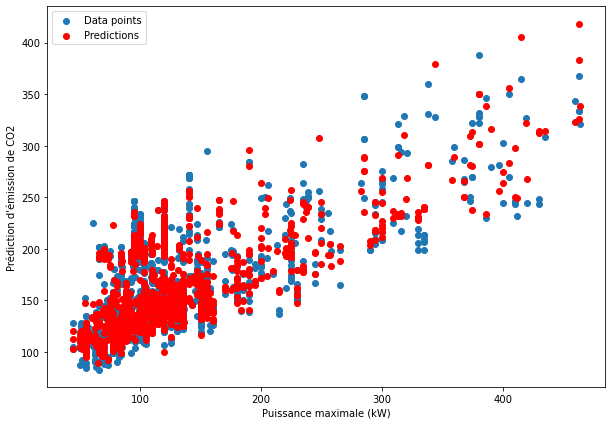

In [26]:
fig, ax = plt.subplots(1,1, figsize=(10,7), sharex=True, sharey=True)


ax.scatter(X_test["Puissance maximale (kW)"], y_test, label="Data points")

ax.scatter(X_test["Puissance maximale (kW)"], y_test_predict,
         color='red', lw=1, label="Predictions")



# Some plotting parameters to make the plot look nicer
ax.set_xlabel("Puissance maximale (kW)")
ax.set_ylabel("Prédiction d'émission de CO2")
ax.legend();


In [27]:
#Pour les graphiques futurs je détermine la variable principale
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_pca = pca.fit_transform(X_train)

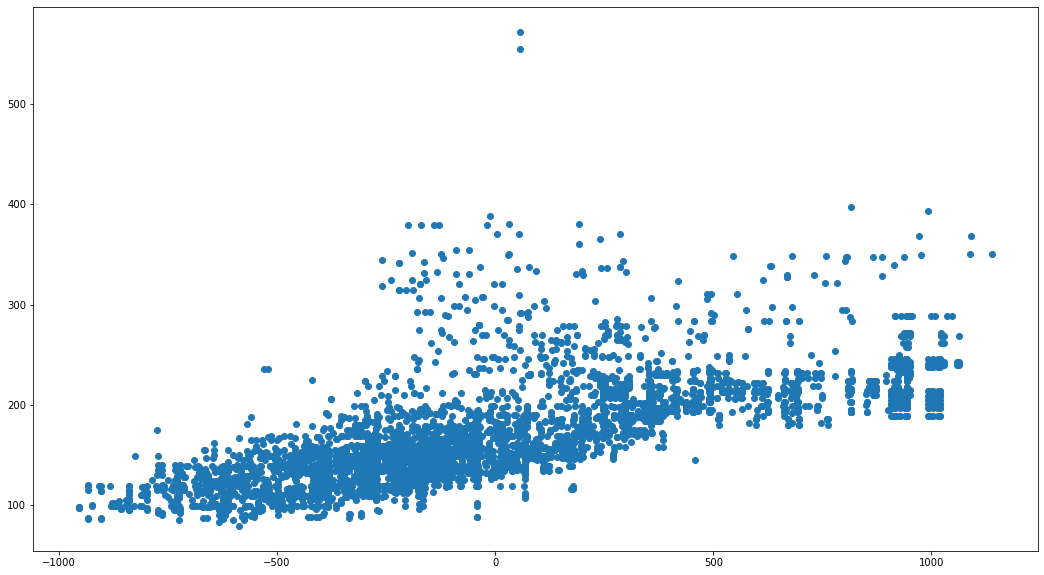

In [28]:
plt.figure(figsize=(18,10))
plt.scatter(x_pca, y_train)
plt.show()

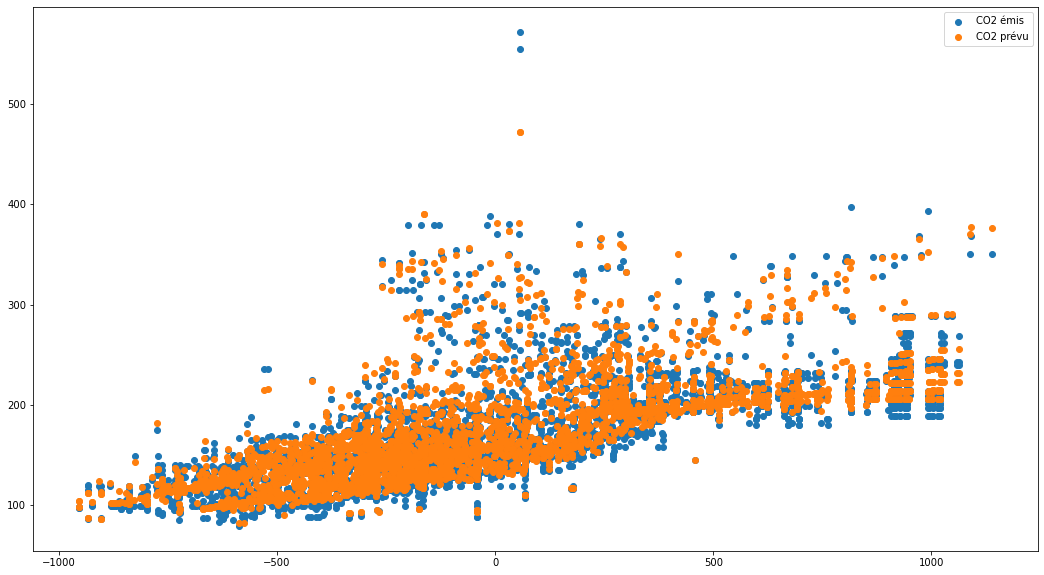

In [29]:
plt.figure(figsize=(18,10))
plt.scatter(x_pca, y_train)
plt.scatter(x_pca, y_train_predict)
plt.legend(["CO2 émis", "CO2 prévu"])
plt.show();

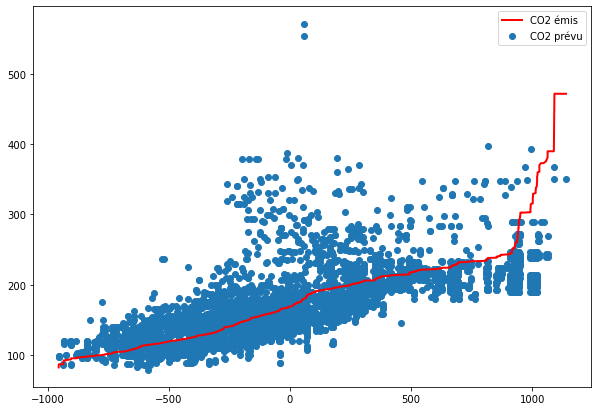

In [31]:
plt.figure(figsize=(10,7))

plt.scatter(x_pca, y_train, label="Data points")

plt.plot(sorted(x_pca), sorted(y_train_predict, reverse=False),
         color='red', lw=2, label="Polynomial Regression model")

plt.legend(["CO2 émis", "CO2 prévu"]);

### <span style="color:blue">&nbsp; &nbsp;2.4.Détermination de l'importance des variables</span>

In [32]:
coefficients=pd.DataFrame(data=model.coef_, columns=['Coef'], index=col_test)

In [33]:
coefficients['Coef_abs']=np.abs(coefficients['Coef'])
#je classe les variables par percentile de valeur absolue de coefficient
coefficients['Percentile']=pd.qcut(coefficients['Coef_abs'], 10, labels=False,duplicates='drop')
coefficients['Percentile'].value_counts()
#les 82 253 variables regroupées dans le percentile 0 peuvent être considérées comme négligeables dans le modèle.
#il en reste quand même trop pour une liste exhaustive des variables utiles 
#les performances du modèle étant très bonnes je ne supprime pas ces variables pour le moment. 

0    82253
1     9137
Name: Percentile, dtype: int64

In [34]:
coefficients.describe()

,Coef,Coef_abs,Percentile
count,91390.000000,91390.000000,91390.000000
mean,0.006960,0.145923,0.099978
std,0.862875,0.850476,0.299972
min,-25.181325,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,36.245937,36.245937,1.000000


In [35]:
coef_nuls=coefficients[coefficients['Coef']==0]
coef_nuls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81394 entries, 1 to gamme_MOY-SUPER gamme_SUPERIEURE^3
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Coef        81394 non-null  float64
 1   Coef_abs    81394 non-null  float64
 2   Percentile  81394 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 2.5+ MB


In [36]:
Coef_tri=coefficients.sort_values(by = 'Coef_abs', ascending = False) 

In [37]:
Coef_tri.head(20)

,Coef,Coef_abs,Percentile
nombre_vitesses^3 Carrosserie_MINIBUS,36.245937,36.245937,1
nombre_vitesses^4,34.830766,34.830766,1
nombre_vitesses masse vide moyenne^2 gamme_LUXE,30.911819,30.911819,1
Puissance maximale (kW)^3 Carrosserie_COUPE,25.936537,25.936537,1
Puissance maximale (kW)^2 type_boite_A Carrosserie_COUPE,25.811002,25.811002,1
nombre_vitesses masse vide moyenne^2 Carrosserie_MINIBUS,-25.181325,25.181325,1
nombre_vitesses masse vide moyenne^2 gamme_MOY-INFER,-25.030495,25.030495,1
masse vide moyenne^3 gamme_LUXE,24.966280,24.966280,1
Puissance maximale (kW)^3 type_boite_A,24.954669,24.954669,1
nombre_vitesses masse vide moyenne^2 Carburant_ES,23.924110,23.924110,1


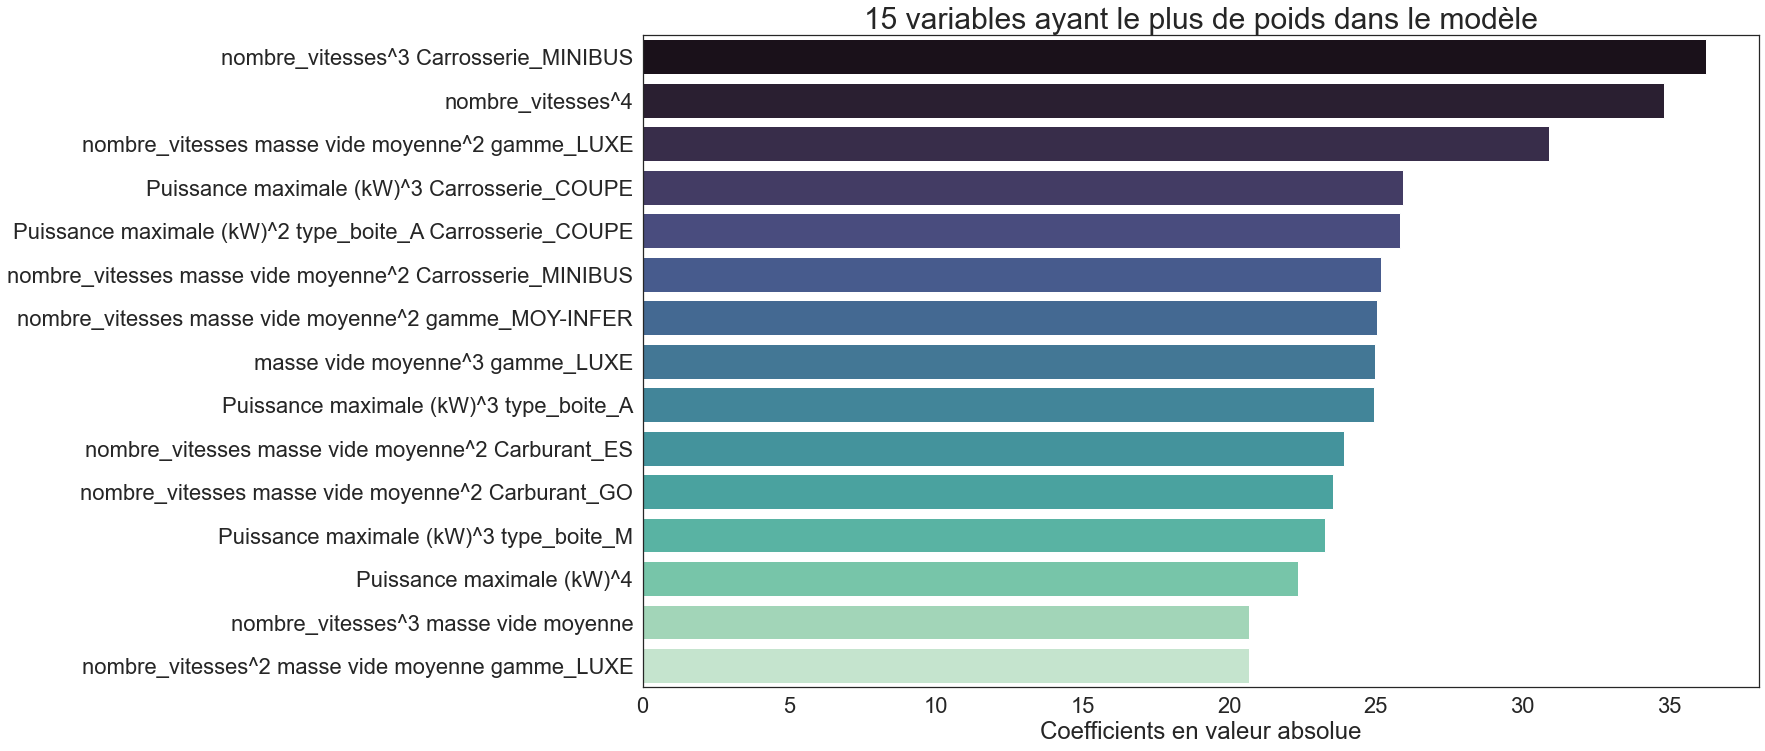

In [38]:
plt.figure(figsize=(20,12))
sns.set(font_scale=2)
sns.set_style("white")
ax=sns.barplot(y=Coef_tri.head(15).index,
            x=Coef_tri['Coef_abs'].head(15),
              palette="mako")
ax.set_title('15 variables ayant le plus de poids dans le modèle',fontsize = 30)
ax.set_xlabel('Coefficients en valeur absolue');

,Coef,Coef_abs,Percentile
nombre_vitesses^3 Carrosserie_MINIBUS,36.245937,36.245937,1
nombre_vitesses^4,34.830766,34.830766,1
nombre_vitesses masse vide moyenne^2 gamme_LUXE,30.911819,30.911819,1
Puissance maximale (kW)^3 Carrosserie_COUPE,25.936537,25.936537,1
Puissance maximale (kW)^2 type_boite_A Carrosserie_COUPE,25.811002,25.811002,1
masse vide moyenne^3 gamme_LUXE,24.966280,24.966280,1
Puissance maximale (kW)^3 type_boite_A,24.954669,24.954669,1
nombre_vitesses masse vide moyenne^2 Carburant_ES,23.924110,23.924110,1
Puissance maximale (kW)^4,22.341044,22.341044,1
nombre_vitesses^3 masse vide moyenne,20.667832,20.667832,1


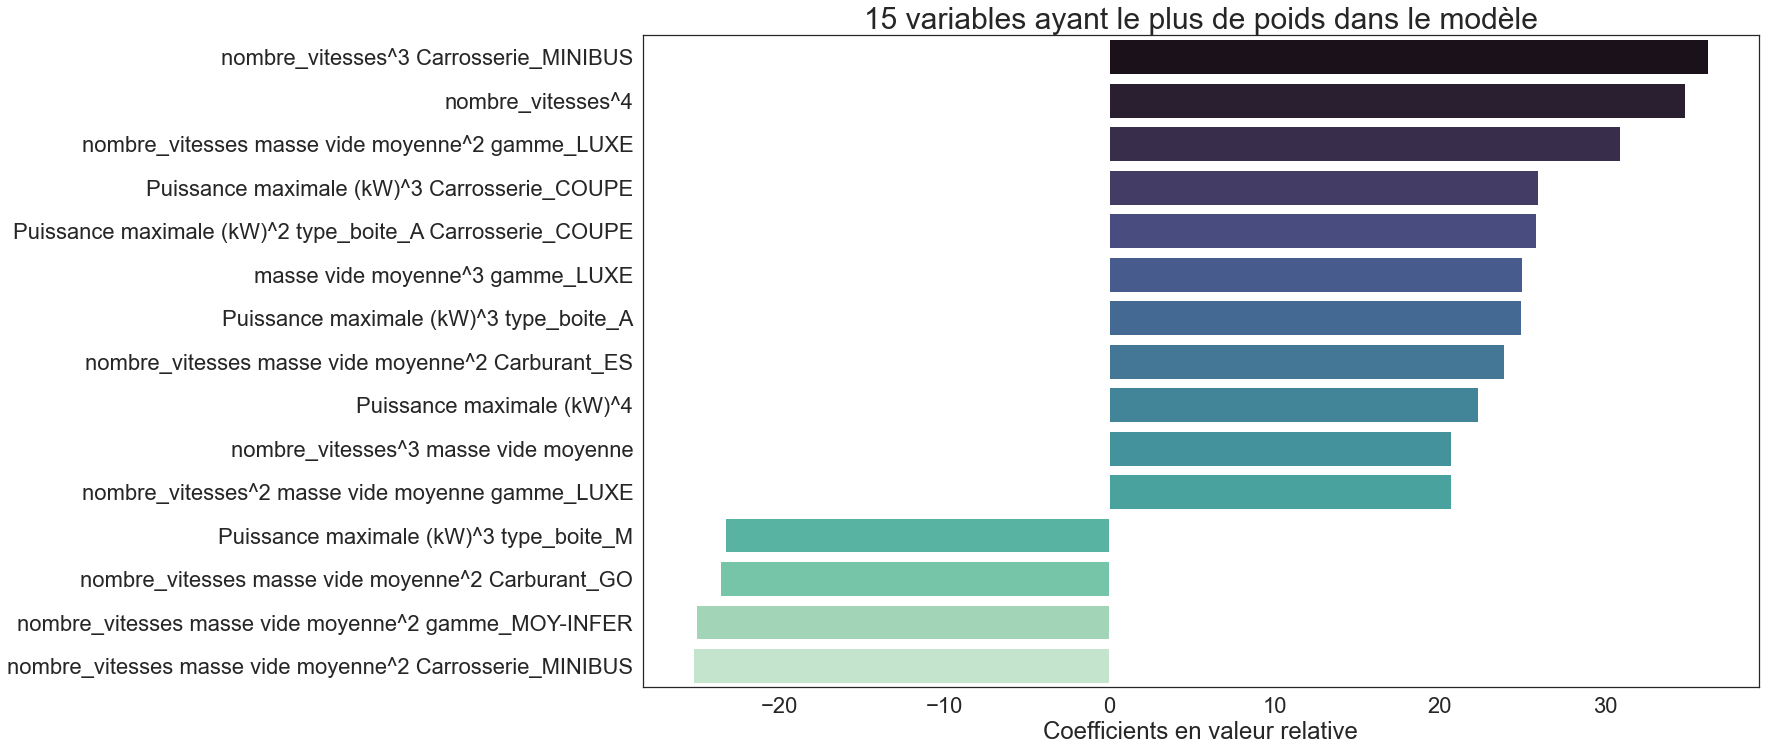

In [39]:
Coef_tri2=Coef_tri.head(15).sort_values(by = 'Coef', ascending = False) 
display(Coef_tri2)

plt.figure(figsize=(20,12))
sns.set(font_scale=2)
sns.set_style("white")
ax=sns.barplot(y=Coef_tri2.index,
            x=Coef_tri2['Coef'],
              palette="mako")
ax.set_title('15 variables ayant le plus de poids dans le modèle',fontsize = 30)
ax.set_xlabel('Coefficients en valeur relative');

In [40]:
#réinitialisation des tailles de caractères des graphs pour la suite
sns.set()
sns.set_style("white")

### <span style="color:blue">&nbsp; &nbsp;2.5.Interprétabilité du modèle</span>

In [41]:
import shap
shap.initjs()

In [42]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print(debut)
#Les données d'entrainement étant trop volumineuse pour cette étape, je les résume avec un kmeans (j'aurais aussi pu prendre un sample)
X_train_summary = shap.kmeans(X_train_poly_mM, 50)
fin=strftime("%Y-%m-%d %H:%M:%S")
print(fin)

2022-02-26 16:55:46
2022-02-26 17:06:15


In [44]:
import random

rand = random.randint(1, len(X_test_poly_mM))

print("Actual Target Value : ", rand)


debut=strftime("%Y-%m-%d %H:%M:%S")
print(debut)
explanation = shap.KernelExplainer(model.predict, X_train_summary)
shap_values = explanation.shap_values(X_test_poly_mM.iloc[rand,:])
shap.force_plot(explanation.expected_value, shap_values, X_test_poly_mM.iloc[rand,:]
               )

fin=strftime("%Y-%m-%d %H:%M:%S")
print(fin)

Actual Target Value :  876
2022-02-26 17:22:15


MemoryError: Unable to allocate 383. GiB for an array with shape (11262, 4569500) and data type float64

In [47]:
#trop de variables pour cette étape

In [45]:
#Les données de test étant un peu trop volumineuse pour cette étape, j'en extrais un sample
X_test_sample = shap.sample(X_test_poly_mM, 100)


In [46]:
X_test_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2324 to 5351
Columns: 91390 entries, 1 to gamme_SUPERIEURE^4
dtypes: float64(91390)
memory usage: 69.7 MB


In [48]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print(debut)
explanation = shap.KernelExplainer(model.predict, X_test_sample)
shap_values = explanation.shap_values(X_test_poly_mM.iloc[rand,:])
shap.force_plot(explanation.expected_value, shap_values, X_test_poly_mM.iloc[rand,:]
               )

fin=strftime("%Y-%m-%d %H:%M:%S")
print(fin)

2022-02-26 17:26:41


MemoryError: Unable to allocate 797. GiB for an array with shape (11704, 9139000) and data type float64

In [ ]:
#trop de variables pour l'interprétabilité

## <span style="color:blue">3.    Tests de sélection de variables en fonction des importances détectées auparavant</span>

### <span style="color:blue">&nbsp; &nbsp;3.1. Modélisation sur les 15 variables les plus importantes</span>

In [49]:
X_train_15=X_train_poly_mM[Coef_tri2.index]
X_test_15=X_test_poly_mM[Coef_tri2.index]

In [50]:
X_train_15.describe()

,nombre_vitesses^3 Carrosserie_MINIBUS,nombre_vitesses^4,nombre_vitesses masse vide moyenne^2 gamme_LUXE,Puissance maximale (kW)^3 Carrosserie_COUPE,Puissance maximale (kW)^2 type_boite_A Carrosserie_COUPE,masse vide moyenne^3 gamme_LUXE,Puissance maximale (kW)^3 type_boite_A,nombre_vitesses masse vide moyenne^2 Carburant_ES,Puissance maximale (kW)^4,nombre_vitesses^3 masse vide moyenne,nombre_vitesses^2 masse vide moyenne gamme_LUXE,Puissance maximale (kW)^3 type_boite_M,nombre_vitesses masse vide moyenne^2 Carburant_GO,nombre_vitesses masse vide moyenne^2 gamme_MOY-INFER,nombre_vitesses masse vide moyenne^2 Carrosserie_MINIBUS
count,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000,4574.000000
mean,0.149484,0.380500,0.087375,0.008932,0.010481,0.061823,0.023632,0.097545,0.016944,0.309735,0.110940,0.010473,0.250366,0.157762,0.142367
std,0.288180,0.220401,0.177381,0.056539,0.063284,0.129637,0.070899,0.157751,0.060976,0.166583,0.222818,0.046953,0.254626,0.255375,0.268242
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.316406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000587,0.213230,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.316406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001761,0.258322,0.000000,0.001543,0.234961,0.000000,0.000000
75%,0.000000,0.586182,0.000000,0.000000,0.000000,0.000000,0.012270,0.182013,0.005147,0.399283,0.000000,0.008997,0.435796,0.240947,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model_15 = Ridge(alpha=0.8)
model_15.fit(X_train_15, y_train)
    # Evaluation du training set

y_train_predict_15 = model_15.predict(X_train_15)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_15)))
train_score= model_15.score(X_train_15,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_15 = model_15.predict(X_test_15)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_15)))
test_score = model_15.score(X_test_15,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=4, Alpha=0.8',
          'MinMaxScaler',
          15,
          'coefficients',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#Les résultats sont vraiment mauvais.... 

heure de début : 2022-02-26 17:33:24


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 23.990071118149796
le score est 0.7776018457398773


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 24.758155526223423
le score est 0.7580759919572785


l'effet d'apprentissage est de
--------------------------------------
3.20% sur l'erreur quadratique moyenne 
de -1.95 points sur le score.


heure de fin : 2022-02-26 17:33:24
Temps d'exécution : 0.02ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931


### <span style="color:blue">&nbsp; &nbsp;3.2. Modélisation sur les 20 variables les plus importantes</span>

In [52]:
X_train_20=X_train_poly_mM[Coef_tri.head(20).index]
X_test_20=X_test_poly_mM[Coef_tri.head(20).index]

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model_20 = Ridge(alpha=0.8)
model_20.fit(X_train_20, y_train)
    # Evaluation du training set

y_train_predict_20 = model_20.predict(X_train_20)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_20)))
train_score= model_20.score(X_train_20,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_20 = model_20.predict(X_test_20)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_20)))
test_score = model_20.score(X_test_20,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')

ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=3, Alpha=0.02',
          'MinMaxScaler',
          20,
          'coefficients',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#Les résultats sont meilleurs mais vraiment moins bons qu'avec toutes les variables.... 

heure de début : 2022-02-26 17:34:15


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 22.063911249684384
le score est 0.811880805024706


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 22.467939461708863
le score est 0.8007635084103999


l'effet d'apprentissage est de
--------------------------------------
1.83% sur l'erreur quadratique moyenne 
de -1.11 points sur le score.


heure de fin : 2022-02-26 17:34:15
Temps d'exécution : 0.018ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471


### <span style="color:blue">&nbsp; &nbsp;3.3. Modélisation sur 50 et 100 variables</span>

#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;3.3.1. 100 variables</span>

In [53]:
X_train_100=X_train_poly_mM[Coef_tri.head(100).index]
X_test_100=X_test_poly_mM[Coef_tri.head(100).index]

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')

start = time() 

model_100 = Ridge(alpha=0.8)
model_100.fit(X_train_100, y_train)
    # Evaluation du training set

y_train_predict_100 = model_100.predict(X_train_100)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_100)))
train_score= model_100.score(X_train_100,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_100 = model_100.predict(X_test_100)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_100)))
test_score = model_100.score(X_test_100,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')

ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=4, Alpha=0.8',
          'MinMaxScaler',
          100,
          'coefficients',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#Les résultats s'améliorent

heure de début : 2022-02-26 17:34:38


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 16.302006672168996
le score est 0.8973047773434492


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 17.08581408850869
le score est 0.8847837466881759


l'effet d'apprentissage est de
--------------------------------------
4.81% sur l'erreur quadratique moyenne 
de -1.25 points sur le score.


heure de fin : 2022-02-26 17:34:38
Temps d'exécution : 0.016ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887


#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;3.3.2. 50 variables</span>

In [54]:
X_train_50=X_train_poly_mM[Coef_tri.head(50).index]
X_test_50=X_test_poly_mM[Coef_tri.head(50).index]

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model_50 = Ridge(alpha=0.8)
model_50.fit(X_train_50, y_train)
    # Evaluation du training set

y_train_predict_50 = model_50.predict(X_train_50)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_50)))
train_score= model_50.score(X_train_50,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_50 = model_50.predict(X_test_50)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_50)))
test_score = model_50.score(X_test_50,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')

ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=4, Alpha=0.8',
          'MinMaxScaler',
          50,
          'coefficients',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#Là ça commence à sérieusement baisser... 

heure de début : 2022-02-26 17:35:01


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 19.69224616644373
le score est 0.8501493538427634


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 20.192574672495773
le score est 0.8390741578168954


l'effet d'apprentissage est de
--------------------------------------
2.54% sur l'erreur quadratique moyenne 
de -1.11 points sur le score.


heure de fin : 2022-02-26 17:35:01
Temps d'exécution : 0.013ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,50,coefficients,0.850149,0.839074,-1.107520,19.692246,20.192575,0.025407,0.012967


### <span style="color:blue">&nbsp; &nbsp;3.4. Modélisation sur les variables avec les coefficients dans les 2 derniers déciles</span>

In [55]:
X_train_18276=X_train_poly_mM[Coef_tri.head(18276).index] #18276 choisi par rapport aux déciles
X_test_18276=X_test_poly_mM[Coef_tri.head(18276).index]

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model_18276 = Ridge(alpha=0.8)
model_18276.fit(X_train_18276, y_train)
    # Evaluation du training set

y_train_predict_18276 = model_18276.predict(X_train_18276)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_18276)))
train_score= model_18276.score(X_train_18276,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_18276 = model_18276.predict(X_test_18276)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_18276)))
test_score = model_18276.score(X_test_18276,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')

ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')


fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=4, Alpha=0.8',
          'MinMaxScaler',
          18276,
          'déciles coefficients',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#Les résultats quasi identiques au modèle avec toutes les variables mais avec un temps d'exécution bien moindre. 
#C'est le meilleur modèle pour le moment.

heure de début : 2022-02-26 17:38:02


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 13.166503456005406
le score est 0.933010147325195


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 15.383184270762506
le score est 0.9066025798516925


l'effet d'apprentissage est de
--------------------------------------
16.84% sur l'erreur quadratique moyenne 
de -2.64 points sur le score.


heure de fin : 2022-02-26 17:38:06
Temps d'exécution : 3.4ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,50,coefficients,0.850149,0.839074,-1.107520,19.692246,20.192575,0.025407,0.012967
9,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742


### <span style="color:blue">&nbsp; &nbsp;3.5. Modélisation sur les variables avec les coefficients dans le dernier décile</span>

In [56]:
X_train_9138=X_train_poly_mM[Coef_tri.head(9138).index] #9138 choisi par rapport aux déciles
X_test_9138=X_test_poly_mM[Coef_tri.head(9138).index]

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')


start = time() 

model_9138 = Ridge(alpha=0.8)
model_9138.fit(X_train_9138, y_train)
    # Evaluation du training set

y_train_predict_9138 = model_9138.predict(X_train_9138)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_9138)))
train_score= model_9138.score(X_train_9138,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_9138 = model_9138.predict(X_test_9138)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_9138)))
test_score = model_9138.score(X_test_9138,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')


ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')


fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=4, Alpha=0.8',
          'MinMaxScaler',
          9138,
          'déciles coefficients',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#Les résultats sont extrêmement proches de ceux avec 18276 variables, 
#mais avec un temps d'éxécution presque 2 fois plus faible, c'est donc celui que je conserve

heure de début : 2022-02-26 17:38:59


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 13.166503410573638
le score est 0.9330101477874996


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 15.38056569056376
le score est 0.9066343740257775


l'effet d'apprentissage est de
--------------------------------------
16.82% sur l'erreur quadratique moyenne 
de -2.64 points sur le score.


heure de fin : 2022-02-26 17:39:01
Temps d'exécution : 2.0ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,50,coefficients,0.850149,0.839074,-1.107520,19.692246,20.192575,0.025407,0.012967
9,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742


## <span style="color:blue">4. Interprétabilité du modèle</span>

### <span style="color:blue">&nbsp; &nbsp;4.1. Interprétabilité avec Shap</span>

In [133]:
#Les données d'entrainement étant trop volumineuse pour cette étape, je les résume avec un kmeans (j'aurais aussi pu prendre un sample)
X_train_summary_9138 = shap.kmeans(X_train_9138, 50)


#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;4.1.2 Interprétabilité locale avec Shap</span>

In [134]:
rand = random.randint(1, len(X_test_9138))

print("Actual Target Value : ", rand)
explanation_9138 = shap.KernelExplainer(model_9138.predict, X_train_summary_9138)
shap_values_9138 = explanation_9138.shap_values(X_test_9138.iloc[rand,:])
shap.force_plot(explanation_9138.expected_value, shap_values_9138, X_test_9138.iloc[rand,:],
                text_rotation=15 #ne fonctionne visiblement pas....
               )


Actual Target Value :  3


MemoryError: Unable to allocate 37.7 GiB for an array with shape (11072, 456900) and data type float64

#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;4.1.2 Interprétabilité globale avec Shap</span>

In [135]:
#Les données de test étant un peu trop volumineuse pour cette étape, j'en extrais un sample
X_test_sample_9138 = shap.sample(X_test_9138, 100)


In [136]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print(debut)
shap_values2_9138 = explanation_9138.shap_values(X_test_sample_9138)
shap.summary_plot(shap_values2_9138, X_test_sample_9138)
#dure environ 6h sur la base complète!


2022-02-26 22:16:04


  0%|          | 0/100 [00:00<?, ?it/s]

MemoryError: Unable to allocate 37.5 GiB for an array with shape (11002, 456900) and data type float64

In [ ]:
fin=strftime("%Y-%m-%d %H:%M:%S")
print(fin)

### <span style="color:blue">&nbsp; &nbsp;4.2. Interprétabilité avec eli5</span>

#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;4.2.1 Interprétabilité locale avec eli5</span>

In [59]:
import eli5
features_9138=X_test_9138.columns.tolist()

In [60]:
rand = random.randint(1, len(X_test_9138))
print("Actual Target Value : ", rand)

eli5.show_prediction(model_9138, X_test_9138.iloc[rand,:], feature_names=features_9138, show_feature_values=True, top=15)

Actual Target Value :  823


#### <span style="color:blue">&nbsp; &nbsp;&nbsp; &nbsp;4.2.2 Interprétabilité globale avec eli5</span>

In [68]:

eli5.show_weights(model_9138,feature_names=features_9138, top=15)

Fin de l'itération 2 et début de l'itération 3

## <span style="color:blue">5.    Tests de sélection de variables avec SelectKBestVariables</span>

### <span style="color:blue">&nbsp; &nbsp;5.1. 10 Meilleures variables sur les données de base</span>

In [61]:
from sklearn.feature_selection import SelectKBest,f_regression
sk=SelectKBest(f_regression,k=10)
sk.fit(X_train_mM,y_train)


SK_feats=pd.DataFrame({'best variables': sk.get_support()}, index=X_train_mM.columns)
BV_feats=SK_feats[SK_feats['best variables']==True]
print(BV_feats)

                         best variables
Puissance maximale (kW)            True
nombre_vitesses                    True
masse vide moyenne                 True
type_boite_A                       True
type_boite_M                       True
Carrosserie_BERLINE                True
Carrosserie_COUPE                  True
Carrosserie_MINIBUS                True
gamme_INFERIEURE                   True
gamme_LUXE                         True


invalid value encountered in true_divide


In [62]:
X_train_f10=X_train_mM[BV_feats.index]
X_test_f10=X_test_mM[BV_feats.index]

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model_f10 = Ridge(alpha=0.7)
model_f10.fit(X_train_f10, y_train)
    # Evaluation du training set

y_train_predict_f10 = model_f10.predict(X_train_f10)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_f10)))
train_score= model_f10.score(X_train_f10,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_f10 = model_f10.predict(X_test_f10)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_f10)))
test_score = model_f10.score(X_test_f10,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Alpha=0.7',
          'MinMaxScaler',
          10,
          'SelectKBest',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#le résultat n'est pas bon du tout par rapport à précédemment. Je vais essayer de l'appliquer sur les  polynomial features.

heure de début : 2022-02-26 17:43:18


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 21.641000878927393
le score est 0.8190232465633996


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 21.314932340120635
le score est 0.8206876045912248


l'effet d'apprentissage est de
--------------------------------------
-1.51% sur l'erreur quadratique moyenne 
de 0.17 points sur le score.


heure de fin : 2022-02-26 17:43:18
Temps d'exécution : 0.01ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,50,coefficients,0.850149,0.839074,-1.107520,19.692246,20.192575,0.025407,0.012967
9,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742


In [63]:
sk_poly=SelectKBest(f_regression,k=10)
sk_poly.fit(X_train_poly_mM,y_train)


SK_poly_feats=pd.DataFrame({'best variables': sk_poly.get_support()}, index=X_train_poly_mM.columns)
BV_poly_feats=SK_poly_feats[SK_poly_feats['best variables']==True]
print(BV_poly_feats)

                                                    best variables
Puissance maximale (kW) masse vide moyenne                    True
Puissance maximale (kW) nombre_vitesses masse v...            True
Puissance maximale (kW) masse vide moyenne^2                  True
Puissance maximale (kW) masse vide moyenne Hybr...            True
Puissance maximale (kW)^2 masse vide moyenne^2                True
Puissance maximale (kW) nombre_vitesses masse v...            True
Puissance maximale (kW) nombre_vitesses masse v...            True
Puissance maximale (kW) masse vide moyenne^3                  True
Puissance maximale (kW) masse vide moyenne^2 Hy...            True
Puissance maximale (kW) masse vide moyenne Hybr...            True


invalid value encountered in true_divide


In [67]:
X_train_f10_poly=X_train_poly_mM[BV_poly_feats.index]
X_test_f10_poly=X_test_poly_mM[BV_poly_feats.index]

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
print('\n')
start = time() 

model_f10_poly = Ridge(alpha=0.8)
model_f10_poly.fit(X_train_f10_poly, y_train)
    # Evaluation du training set

y_train_predict_f10_poly = model_f10_poly.predict(X_train_f10_poly)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_f10_poly)))
train_score= model_f10_poly.score(X_train_f10_poly,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_f10_poly = model_f10_poly.predict(X_test_f10_poly)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_f10_poly)))
test_score = model_f10_poly.score(X_test_f10_poly,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=3,Alpha=0.8',
          'MinMaxScaler',
          10,
          'SelectKBest',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#le résultat est encore pire, je vais essayer d'appliquer un polynomial features aux 10 variables sélectionnées précedemment

heure de début : 2022-02-26 17:47:39


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 26.60571810386045
le score est 0.7264617410728178


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 26.088510773551008
le score est 0.7313783744557973


l'effet d'apprentissage est de
--------------------------------------
-1.94% sur l'erreur quadratique moyenne 
de 0.49 points sur le score.


heure de fin : 2022-02-26 17:47:39
Temps d'exécution : 0.0084ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,50,coefficients,0.850149,0.839074,-1.107520,19.692246,20.192575,0.025407,0.012967
9,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742


In [68]:
polynomial_features= PolynomialFeatures(degree=2)
X_train_f10poly = polynomial_features.fit_transform(X_train_f10)
X_test_f10poly = polynomial_features.transform(X_test_f10)


scaler = preprocessing.MinMaxScaler()
X_train_f10new=scaler.fit_transform(X_train_f10poly)
X_test_f10new=scaler.transform(X_test_f10poly)


col_train=polynomial_features.get_feature_names(X_train_f10.columns)
col_test=polynomial_features.get_feature_names(X_test_f10.columns)
X_train_f10poly_std=pd.DataFrame(data=X_train_f10new,columns=col_train,index=X_train_f10.index)
X_test_f10poly_std=pd.DataFrame(data=X_test_f10new,columns=col_test,index=X_test_f10.index)

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

model_f10_poly = Ridge(alpha=0.8)
model_f10_poly.fit(X_train_f10poly_std, y_train)
    # Evaluation du training set

y_train_predict_f10_poly = model_f10_poly.predict(X_train_f10poly_std)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_f10_poly)))
train_score= model_f10_poly.score(X_train_f10poly_std,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_f10_poly = model_f10_poly.predict(X_test_f10poly_std)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_f10_poly)))
test_score = model_f10_poly.score(X_test_f10poly_std,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=2 après sélection,Alpha=0.8',
          'MinMaxScaler',
          10,
          'SelectKBest',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats

heure de début : 2022-02-26 17:47:57


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 19.39919158701195
le score est 0.8545762390833932


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 19.57913559783043
le score est 0.8487033110646427


l'effet d'apprentissage est de
--------------------------------------
0.93% sur l'erreur quadratique moyenne 
de -0.59 points sur le score.


heure de fin : 2022-02-26 17:47:57
Temps d'exécution : 0.016ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,50,coefficients,0.850149,0.839074,-1.107520,19.692246,20.192575,0.025407,0.012967
9,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742


In [69]:
polynomial_features= PolynomialFeatures(degree=3)
X_train_f10poly = polynomial_features.fit_transform(X_train_f10)
X_test_f10poly = polynomial_features.transform(X_test_f10)


scaler = preprocessing.MinMaxScaler()
X_train_f10new=scaler.fit_transform(X_train_f10poly)
X_test_f10new=scaler.transform(X_test_f10poly)


col_train=polynomial_features.get_feature_names(X_train_f10.columns)
col_test=polynomial_features.get_feature_names(X_test_f10.columns)
X_train_f10poly_std=pd.DataFrame(data=X_train_f10new,columns=col_train,index=X_train_f10.index)
X_test_f10poly_std=pd.DataFrame(data=X_test_f10new,columns=col_test,index=X_test_f10.index)

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

model_f10_poly = Ridge(alpha=0.8)
model_f10_poly.fit(X_train_f10poly_std, y_train)

    # Evaluation du training set

y_train_predict_f10_poly = model_f10_poly.predict(X_train_f10poly_std)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_f10_poly)))
train_score= model_f10_poly.score(X_train_f10poly_std,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_f10_poly = model_f10_poly.predict(X_test_f10poly_std)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_f10_poly)))
test_score = model_f10_poly.score(X_test_f10poly_std,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Degré=3 après sélection, Alpha=0.8',
          'MinMaxScaler',
          10,
          'SelectKBest',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats

heure de début : 2022-02-26 17:48:18


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 18.61260381820971
le score est 0.8661302741096383


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 19.280374577051795
le score est 0.8532854014536727


l'effet d'apprentissage est de
--------------------------------------
3.59% sur l'erreur quadratique moyenne 
de -1.28 points sur le score.


heure de fin : 2022-02-26 17:48:18
Temps d'exécution : 0.028ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,15,coefficients,0.777602,0.758076,-1.952585,23.990071,24.758156,0.032017,0.019931
6,Ridge,"Degré=3, Alpha=0.02",MinMaxScaler,20,coefficients,0.811881,0.800764,-1.111730,22.063911,22.467939,0.018312,0.018471
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,50,coefficients,0.850149,0.839074,-1.107520,19.692246,20.192575,0.025407,0.012967
9,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742


In [70]:
resultats=resultats.sort_values(by=['test score','train score'], ascending=False)
resultats

,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
10,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
9,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
3,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
4,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
7,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
2,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
1,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
0,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
14,Ridge,"Degré=3 après sélection, Alpha=0.8",MinMaxScaler,10,SelectKBest,0.866130,0.853285,-1.284487,18.612604,19.280375,0.035877,0.028065
13,Ridge,"Degré=2 après sélection,Alpha=0.8",MinMaxScaler,10,SelectKBest,0.854576,0.848703,-0.587293,19.399192,19.579136,0.009276,0.015932


Le meilleur rapport score, rmse, effet d'apprentissage et temps d'exécution est pour le modèle Ridge(alpha=0.8) appliqué au Polynomial Feature de Degré=4 en conservant 9138 variables

## <span style="color:blue">6.    Tests de réduction de dimension avec LDA</span>

In [71]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [93]:
lda=LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_train_lda.shape


scaler = preprocessing.MinMaxScaler()
X_train_lda_mM=scaler.fit_transform(X_train_lda)
X_test_lda_mM=scaler.transform(X_test_lda)


debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

model_lda_ = Ridge(alpha=0.8)
model_lda_.fit(X_train_lda_mM, y_train)

    # Evaluation du training set

y_train_predict_lda_ = model_lda_.predict(X_train_lda_mM)
train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict_lda_)))
train_score= model_lda_.score(X_train_lda_mM,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')
 
# Evaluation du testing set
y_test_predict_lda_ = model_lda_.predict(X_test_lda_mM)
test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict_lda_)))
test_score = model_lda_.score(X_test_lda_mM,y_test)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['Ridge',
          'Alpha=0.7',
          'MinMaxScaler',
          X_train_lda.shape[1],
          'LDA',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats

heure de début : 2022-02-26 18:10:24


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 18.16249382307648
le score est 0.872526747524725


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 18.233103829302067
le score est 0.8687910060195261


l'effet d'apprentissage est de
--------------------------------------
0.39% sur l'erreur quadratique moyenne 
de -0.37 points sur le score.


heure de fin : 2022-02-26 18:10:24
Temps d'exécution : 0.004ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
1,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
2,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
3,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
4,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
5,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
6,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
7,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
8,Ridge,"Degré=3 après sélection, Alpha=0.8",MinMaxScaler,10,SelectKBest,0.866130,0.853285,-1.284487,18.612604,19.280375,0.035877,0.028065
9,Ridge,"Degré=2 après sélection,Alpha=0.8",MinMaxScaler,10,SelectKBest,0.854576,0.848703,-0.587293,19.399192,19.579136,0.009276,0.015932


## <span style="color:blue">7.    Test d'un modèle random forest</span>

### <span style="color:blue">7.1    Test du modèle</span>

In [94]:
# J'utilise numpy pour convertir mes données en array, nécessaire pour utiliser random forest
# je repars de mes jeux de test et d'entrainement précédents pour comparer ce qui est comparable
train_labels = np.array(y_train)
test_labels=np.array(y_test)

# Je sauvegarde les noms des variables pour plus tard
feature_list = list(feats.columns)
# et je convertis les variables en array
train_features = np.array(X_train)
test_features = np.array(X_test)

In [95]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4574, 36)
Training Labels Shape: (4574,)
Testing Features Shape: (1144, 36)
Testing Labels Shape: (1144,)


In [96]:
from sklearn.ensemble import RandomForestRegressor

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')


rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)
  
    # Evaluation du training set

rf_train_pred = rf.predict(train_features)
train_rmse= (np.sqrt(mean_squared_error(train_labels, rf_train_pred)))
train_score= rf.score(train_features,train_labels)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')

 
# Evaluation du testing set
rf_test_pred = rf.predict(test_features)
test_rmse= (np.sqrt(mean_squared_error(test_labels, rf_test_pred)))
test_score= rf.score(test_features,test_labels)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['RandomForestRegressor',
          'n_estimators = 1000',
          'aucune',
          len(feature_list),
          'aucune',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats


#le résultat est excellent malgré un léger effet de surapprentissage et un temmps d'exécution très supérieur aux autres modèles vus. 





heure de début : 2022-02-26 18:11:07


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 4.986416169382309
le score est 0.9903917310288783


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 10.712378002044458
le score est 0.9547087639285169


l'effet d'apprentissage est de
--------------------------------------
114.83% sur l'erreur quadratique moyenne 
de -3.57 points sur le score.


heure de fin : 2022-02-26 18:11:16
Temps d'exécution : 9.1ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
1,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
2,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
3,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
4,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
5,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
6,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
7,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
8,Ridge,"Degré=3 après sélection, Alpha=0.8",MinMaxScaler,10,SelectKBest,0.866130,0.853285,-1.284487,18.612604,19.280375,0.035877,0.028065
9,Ridge,"Degré=2 après sélection,Alpha=0.8",MinMaxScaler,10,SelectKBest,0.854576,0.848703,-0.587293,19.399192,19.579136,0.009276,0.015932


### <span style="color:blue">7.2    Tests des paramètres</span>

In [79]:
#Je regarde si je trouve des paramètres estompant l'effet de surapprentissage.

In [100]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

param_grid= {'n_estimators': [200, 1000, 2000], 
             'max_features': ['auto', 'sqrt'], 
              'bootstrap': [True, False]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


heure de début : 2022-02-26 18:16:23


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 2000}


heure de fin : 2022-02-26 18:17:05
Temps d'exécution : 4.2e+01ms


In [102]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

param_grid= {'n_estimators': [1800, 2000, 2200], 
             'max_features': ['auto'], 
             'max_depth': [10, 50, 110],
              'bootstrap': [True]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


heure de début : 2022-02-26 18:19:10


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 1800}


heure de fin : 2022-02-26 18:19:57
Temps d'exécution : 4.8e+01ms


In [103]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

param_grid= {'n_estimators': [1700, 1800, 1900], 
             'max_features': ['auto'], 
             'max_depth': [30, 50, 70],
              'bootstrap': [True]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


heure de début : 2022-02-26 18:22:02


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 1900}


heure de fin : 2022-02-26 18:22:50
Temps d'exécution : 4.8e+01ms


In [104]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

param_grid= {'n_estimators': [1900], 
             'max_features': ['auto'], 
             'max_depth': [40, 50, 60],
             'min_samples_split': [2, 5, 10],
              'bootstrap': [True]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


heure de début : 2022-02-26 18:23:50


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'bootstrap': True, 'max_depth': 60, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1900}


heure de fin : 2022-02-26 18:24:35
Temps d'exécution : 4.5e+01ms


In [109]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

param_grid= {'n_estimators': [1900], 
             'max_features': ['auto'], 
             'max_depth': [60,None],
             'min_samples_split': [2,3,4],
             'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


heure de début : 2022-02-26 18:31:00


Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'bootstrap': True, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1900}


heure de fin : 2022-02-26 18:32:14
Temps d'exécution : 7.4e+01ms


In [110]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

param_grid= {'n_estimators': [1900], 
             'max_features': ['auto'], 
             'max_depth': [60],
             'min_samples_split': [0.5,0.8,2],
             'min_samples_leaf': [1],
              'bootstrap': [True]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print('\n')

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')


heure de début : 2022-02-26 18:33:12


Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'bootstrap': True, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1900}


heure de fin : 2022-02-26 18:33:37
Temps d'exécution : 2.5e+01ms


In [111]:
pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score','mean_fit_time','rank_test_score']].sort_values(by = 'rank_test_score')

,params,mean_test_score,std_test_score,mean_fit_time,rank_test_score
2,"{'bootstrap': True, 'max_depth': 60, 'max_feat...",0.946791,0.004222,10.361027,1
0,"{'bootstrap': True, 'max_depth': 60, 'max_feat...",0.401841,0.020110,2.287242,2
1,"{'bootstrap': True, 'max_depth': 60, 'max_feat...",-0.001448,0.001108,1.365242,3


In [113]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')


rfBG = RandomForestRegressor(bootstrap=True, max_depth=60, max_features='auto',min_samples_leaf= 1, 
                             min_samples_split= 2,
                      n_estimators=1900, random_state=42)
rfBG.fit(train_features, train_labels)
  
    # Evaluation du training set

rfBG_train_pred = rfBG.predict(train_features)
train_rmse= (np.sqrt(mean_squared_error(train_labels, rfBG_train_pred)))
train_score= rfBG.score(train_features,train_labels)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')

 
# Evaluation du testing set
rfBG_test_pred = rfBG.predict(test_features)
test_rmse= (np.sqrt(mean_squared_error(test_labels, rfBG_test_pred)))
test_score= rfBG.score(test_features,test_labels)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['RandomForestRegressor',
          "bootstrap= True, max_depth= 60, max_features= auto, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1900",
          'aucune',
          len(feature_list),
          'aucune',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats


#le résultat est excellent mais le surapprentissage est à peine plus faible qu'avec le précédent, mais un temps d'exécution quasiement doublé
#je vais donc essayer de réduire l'effet d'apprentissage sur la base du Randoforest n_estimator=1000

heure de début : 2022-02-26 18:38:02


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 4.980363983396615
le score est 0.9904150406520144


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 10.690035367281231
le score est 0.9548974933155675


l'effet d'apprentissage est de
--------------------------------------
114.64% sur l'erreur quadratique moyenne 
de -3.55 points sur le score.


heure de fin : 2022-02-26 18:38:19
Temps d'exécution : 1.7e+01ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
1,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
2,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
3,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
4,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
5,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
6,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
7,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
8,Ridge,"Degré=3 après sélection, Alpha=0.8",MinMaxScaler,10,SelectKBest,0.866130,0.853285,-1.284487,18.612604,19.280375,0.035877,0.028065
9,Ridge,"Degré=2 après sélection,Alpha=0.8",MinMaxScaler,10,SelectKBest,0.854576,0.848703,-0.587293,19.399192,19.579136,0.009276,0.015932


In [116]:
#sur le modèle random forest n_estimator=1000 je vais essayer de réduire l'effet de surapprentissage en ne gardant que les variables d'importance
#Comme j'ai appelé les modèles de sélection de paramètres rf, je refais l'entrainement du modèle et les créations des variables

debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')


rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)
  
    # Evaluation du training set

rf_train_pred = rf.predict(train_features)
train_rmse= (np.sqrt(mean_squared_error(train_labels, rf_train_pred)))
train_score= rf.score(train_features,train_labels)
 
# Evaluation du testing set
rf_test_pred = rf.predict(test_features)
test_rmse= (np.sqrt(mean_squared_error(test_labels, rf_test_pred)))
test_score= rf.score(test_features,test_labels)

ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

heure de début : 2022-02-26 18:45:37


heure de fin : 2022-02-26 18:45:46


In [117]:
#récupération des indices d'importance
importances = list(rf.feature_importances_)

#création d'un dataframe associant chaque variable et son importance
feature_importances=pd.DataFrame({'Importance': importances}, index=feature_list).round(2).sort_values(by = 'Importance', ascending=False)

display(feature_importances)

,Importance
masse vide moyenne,0.50
Puissance maximale (kW),0.37
Carburant_ES,0.05
nombre_vitesses,0.03
Carrosserie_COMBISPACE,0.01
type_boite_A,0.01
Carrosserie_MONOSPACE,0.00
Carrosserie_CABRIOLET,0.00
Carrosserie_COUPE,0.00
Carrosserie_MINIBUS,0.00


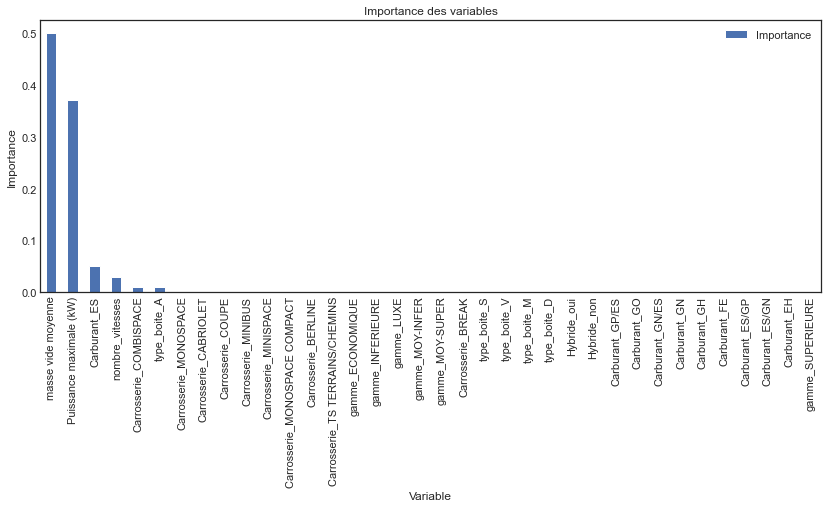

In [118]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (14, 5)

ax = feature_importances.plot.bar( rot=90)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Importance des variables');

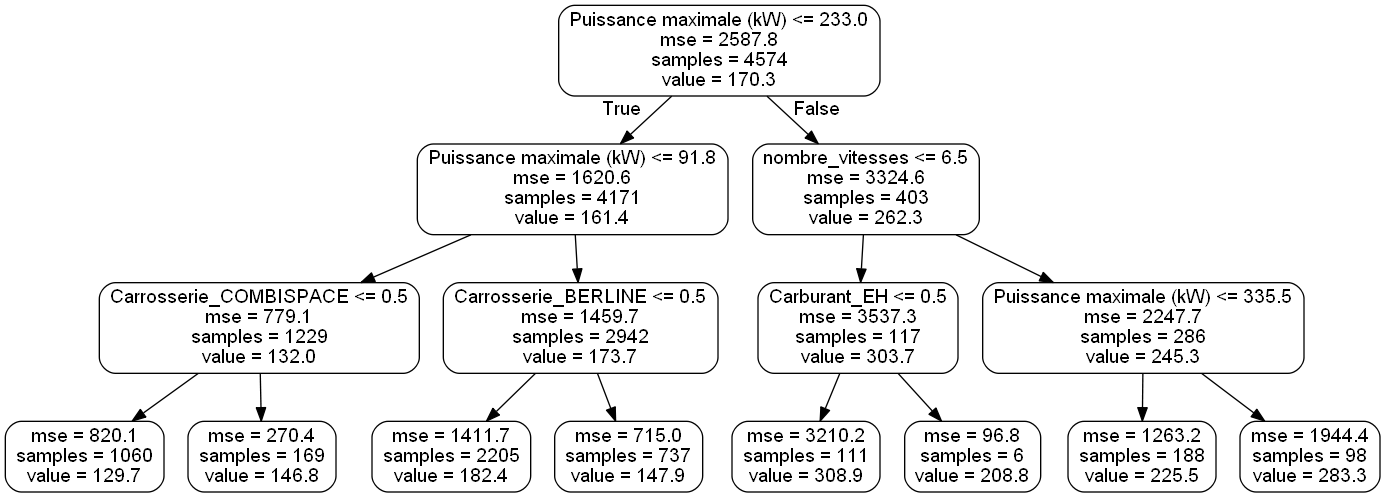

In [119]:
# Visualisation d'une version simplifiée de l'arbre de régression (la version complète a trop de branches et est illisible)
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image  

# Limitation à 3 niveaux
rf_small = RandomForestRegressor(bootstrap=False, max_depth=3, max_features='sqrt',
                      n_estimators=800, random_state=42)
rf_small.fit(train_features, train_labels)
# extraction de l'arbre
tree_small = rf_small.estimators_[5]
# enregistrement et affichage de l'arbre sous forme d'image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
Image(graph.create_png()) 

In [120]:
#je teste mon modèle en ne gardant que les features avec une importance >=0.1
#je repasse par une df_train et une df_test pour ne pas changer les jeux de données de test et d'entrainement pour que les comparaisons soient valables.
df_train=pd.DataFrame(train_features, columns=feature_list)
df_test=pd.DataFrame(test_features, columns=feature_list)
colonnes=feature_importances[feature_importances['Importance']>=0.01].index
df_train_importance=df_train[colonnes]
df_test_importance=df_test[colonnes]
# Les noms des variables sont déjà sauvegardée dans la variable colonnes

#  je convertis les variables en array
train_important = np.array(df_train_importance)
test_important=np.array(df_test_importance)


In [121]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')


rf_imp =  RandomForestRegressor(n_estimators=100, random_state=42)
rf_imp.fit(train_important, train_labels)

  # Evaluation du training set
rf_imp_train_pred = rf_imp.predict(train_important)
train_rmse= (np.sqrt(mean_squared_error(train_labels, rf_imp_train_pred)))
train_score= rf_imp.score(train_important,train_labels)

print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')

 
# Evaluation du testing set
rf_imp_test_pred = rf_imp.predict(test_important)
test_rmse= (np.sqrt(mean_squared_error(test_labels, rf_imp_test_pred)))
test_score= rf_imp.score(test_important,test_labels)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['RandomForestRegressor',
          "n_estimators=1000",
          'aucune',
          len(colonnes),
          'feature importance',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
#le résultat est toujours excellent mais le surapprentissage est encore plus fort qu'avec le précédent, donc je garde le modèle de base. 


heure de début : 2022-02-26 18:48:26


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 5.592073081628777
le score est 0.9879159146315074


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 12.223459783429984
le score est 0.9410300592494678


l'effet d'apprentissage est de
--------------------------------------
118.59% sur l'erreur quadratique moyenne 
de -4.69 points sur le score.


heure de fin : 2022-02-26 18:48:27
Temps d'exécution : 0.59ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
1,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
2,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
3,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
4,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
5,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
6,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
7,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
8,Ridge,"Degré=3 après sélection, Alpha=0.8",MinMaxScaler,10,SelectKBest,0.866130,0.853285,-1.284487,18.612604,19.280375,0.035877,0.028065
9,Ridge,"Degré=2 après sélection,Alpha=0.8",MinMaxScaler,10,SelectKBest,0.854576,0.848703,-0.587293,19.399192,19.579136,0.009276,0.015932


In [88]:
#Je teste le modèle rf avec les polynomial features de degré 2

In [122]:

polynomial_features= PolynomialFeatures(degree=2)
X_train_poly2 = polynomial_features.fit_transform(X_train)
X_test_poly2 = polynomial_features.transform(X_test)


scaler = preprocessing.StandardScaler()
X_train_new2=scaler.fit_transform(X_train_poly2)
X_test_new2=scaler.transform(X_test_poly2)


col_poly2=polynomial_features.get_feature_names(X_train.columns)

X_train_poly_std2=pd.DataFrame(data=X_train_new2,columns=col_poly2,index=X_train.index)
X_test_poly_std2=pd.DataFrame(data=X_test_new2,columns=col_poly2,index=X_test.index)


In [123]:
# J'utilise numpy pour convertir mes données en array, nécessaire pour utiliser random forest

# Les noms des variables sont déjà sauvegardées dans col_train2 et col_test2
#je convertis les variables en array
train_features_poly2 = np.array(X_train_poly_std2)
test_features_poly2 = np.array(X_test_poly_std2)


In [124]:
train_features_poly2.shape

(4574, 703)

In [125]:
len(col_poly2)

703

In [126]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

rf_poly2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_poly2.fit(train_features_poly2, train_labels)

rf_poly2_train_pred = rf_poly2.predict(train_features_poly2)
train_rmse= (np.sqrt(mean_squared_error(train_labels, rf_poly2_train_pred)))
train_score= rf_poly2.score(train_features_poly2,train_labels)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')

 
# Evaluation du testing set
rf_poly2_test_pred = rf_poly2.predict(test_features_poly2)
test_rmse= (np.sqrt(mean_squared_error(test_labels, rf_poly2_test_pred)))
test_score= rf_poly2.score(test_features_poly2,test_labels)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['RandomForestRegressor',
          "Degré=2,bootstrap=False, max_depth=20, max_features='sqrt',n_estimators=800",
          'aucune',
          len(col_poly2),
          'aucune',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
 
#le résultat est quasi-identique au modèle de base avec un temps d'éxécution très supérieur donc il n'y a aucun intérêt à complexifier


heure de début : 2022-02-26 18:49:11


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 4.922910293022676
le score est 0.9906349100789956


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 10.70088443856015
le score est 0.9548058998655878


l'effet d'apprentissage est de
--------------------------------------
117.37% sur l'erreur quadratique moyenne 
de -3.58 points sur le score.


heure de fin : 2022-02-26 18:50:18
Temps d'exécution : 6.7e+01ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
1,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
2,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
3,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
4,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
5,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970
6,Ridge,Alpha=0.7,StandardScaler,36,aucune,0.872566,0.868447,-0.411917,0.357721,0.359638,0.005358,0.008969
7,Ridge,Alpha=0.7,RobustScaler,36,aucune,0.872551,0.868162,-0.438907,0.263200,0.264881,0.006387,0.027902
8,Ridge,"Degré=3 après sélection, Alpha=0.8",MinMaxScaler,10,SelectKBest,0.866130,0.853285,-1.284487,18.612604,19.280375,0.035877,0.028065
9,Ridge,"Degré=2 après sélection,Alpha=0.8",MinMaxScaler,10,SelectKBest,0.854576,0.848703,-0.587293,19.399192,19.579136,0.009276,0.015932


In [128]:

polynomial_features= PolynomialFeatures(degree=3)
X_train_poly3 = polynomial_features.fit_transform(X_train)
X_test_poly3 = polynomial_features.transform(X_test)


scaler = preprocessing.StandardScaler()
X_train_new3=scaler.fit_transform(X_train_poly3)
X_test_new3=scaler.transform(X_test_poly3)


col_poly3=polynomial_features.get_feature_names(X_train.columns)

X_train_poly_std3=pd.DataFrame(data=X_train_new3,columns=col_poly3,index=X_train.index)
X_test_poly_std3=pd.DataFrame(data=X_test_new3,columns=col_poly3,index=X_test.index)


In [129]:
debut=strftime("%Y-%m-%d %H:%M:%S")
print('heure de début :',debut)
start = time() 
print('\n')

rf_poly3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_poly3.fit(X_train_poly_std3, y_train)

rf_poly3_train_pred = rf_poly3.predict(X_train_poly_std3)
train_rmse= (np.sqrt(mean_squared_error(y_train, rf_poly3_train_pred)))
train_score= rf_poly3.score(X_train_poly_std3,y_train)

 
print("La performance du modèle sur la base d'apprentissage")
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(train_rmse))
print('le score est {}'.format(train_score))
print('\n')

 
# Evaluation du testing set
rf_poly3_test_pred = rf_poly3.predict(X_test_poly_std3)
test_rmse= (np.sqrt(mean_squared_error(y_test, rf_poly3_test_pred)))
test_score= rf_poly3.score(X_test_poly_std3,y_test)

print('La performance du modèle sur la base de test')
print('--------------------------------------')
print("L'erreur quadratique moyenne est {}".format(test_rmse))
print('le score est {}'.format(test_score))
print('\n')
 
ecart_rmse=test_rmse/train_rmse-1
ecart_score=(test_score-train_score)*100

print("l'effet d'apprentissage est de")
print('--------------------------------------')
print("{:2.2%} sur l'erreur quadratique moyenne \nde {:.2f} points sur le score.".format(ecart_rmse,ecart_score))
print('\n')
 
fin=strftime("%Y-%m-%d %H:%M:%S")
print('heure de fin :',fin)

end = time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

lst_val=[['RandomForestRegressor',
          "Degré=3,n_estimators=1000",
          'aucune',
          len(X_train_poly_std3.columns),
          'aucune',
         train_score,
         test_score,
         ecart_score,
         train_rmse,
         test_rmse,
         ecart_rmse,
         elapsed]]
res_temp=pd.DataFrame(lst_val,columns=lst_col)
resultats=resultats.append(res_temp,ignore_index=True)
resultats
 
#le résultat est quasi-identique au modèle de base avec un temps d'éxécution très supérieur donc il n'y a aucun intérêt à complexifier


heure de début : 2022-02-26 19:03:49


La performance du modèle sur la base d'apprentissage
--------------------------------------
L'erreur quadratique moyenne est 5.001975533877039
le score est 0.9903316751498962


La performance du modèle sur la base de test
--------------------------------------
L'erreur quadratique moyenne est 10.990456477762818
le score est 0.9523268491013624


l'effet d'apprentissage est de
--------------------------------------
119.72% sur l'erreur quadratique moyenne 
de -3.80 points sur le score.


heure de fin : 2022-02-26 19:15:31
Temps d'exécution : 7e+02ms


,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,RandomForestRegressor,"bootstrap= True, max_depth= 60, max_features= ...",aucune,36,aucune,0.990415,0.954897,-3.551755,4.980364,10.690035,1.146437,17.128410
1,RandomForestRegressor,"Degré=2,bootstrap=False, max_depth=20, max_fea...",aucune,703,aucune,0.990635,0.954806,-3.582901,4.922910,10.700884,1.173691,66.614587
2,RandomForestRegressor,n_estimators = 1000,aucune,36,aucune,0.990392,0.954709,-3.568297,4.986416,10.712378,1.148312,9.078887
3,RandomForestRegressor,n_estimators=1000,aucune,6,feature importance,0.987916,0.941030,-4.688586,5.592073,12.223460,1.185855,0.591528
4,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
6,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
7,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887
9,Ridge,Alpha=0.7,MinMaxScaler,36,aucune,0.872456,0.868937,-0.351952,0.036851,0.036963,0.003053,0.008970


In [130]:
resultats=resultats.sort_values(by=['test score','train score'], ascending=False)
resultats

,modèle,paramètres,normalisation,nombre de variables,méthode sélection variables,train score,test score,écart score,train rmse,test rmse,écart rmse,temps exécution (ms)
0,RandomForestRegressor,"bootstrap= True, max_depth= 60, max_features= ...",aucune,36,aucune,0.990415,0.954897,-3.551755,4.980364,10.690035,1.146437,17.128410
1,RandomForestRegressor,"Degré=2,bootstrap=False, max_depth=20, max_fea...",aucune,703,aucune,0.990635,0.954806,-3.582901,4.922910,10.700884,1.173691,66.614587
2,RandomForestRegressor,n_estimators = 1000,aucune,36,aucune,0.990392,0.954709,-3.568297,4.986416,10.712378,1.148312,9.078887
20,RandomForestRegressor,"Degré=3,n_estimators=1000",aucune,9139,aucune,0.990332,0.952327,-3.800483,5.001976,10.990456,1.197223,702.081311
3,RandomForestRegressor,n_estimators=1000,aucune,6,feature importance,0.987916,0.941030,-4.688586,5.592073,12.223460,1.185855,0.591528
4,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,9138,déciles coefficients,0.933010,0.906634,-2.637577,13.166503,15.380566,0.168159,1.996140
5,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,18276,déciles coefficients,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,3.434742
6,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,91390,aucune,0.933010,0.906603,-2.640757,13.166503,15.383184,0.168358,15.920948
7,Ridge,"Degré=4, Alpha=0.8, Interaction_only=True",MinMaxScaler,66712,aucune,0.925483,0.906049,-1.943384,13.886524,15.428691,0.111055,11.493944
8,Ridge,"Degré=4, Alpha=0.8",MinMaxScaler,100,coefficients,0.897305,0.884784,-1.252103,16.302007,17.085814,0.048080,0.015887


In [131]:
resultats.to_csv('resultats_2&3new.csv')